In [3]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import numpy as np

In [4]:
csv = pd.read_csv(r"C:\Users\stanx\Desktop\classification loan\loan_data.csv")
df = pd.DataFrame(csv)

train = df[:33750]
test = df[33750:]

In [5]:
train

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33745,25.0,male,High School,59110.0,2,RENT,8000.0,MEDICAL,14.99,0.14,4.0,607,Yes,0
33746,30.0,male,Bachelor,216916.0,9,MORTGAGE,20056.0,EDUCATION,11.48,0.09,8.0,707,No,0
33747,31.0,male,Associate,41407.0,8,RENT,5000.0,VENTURE,8.87,0.12,7.0,703,No,0
33748,27.0,male,Bachelor,44369.0,3,MORTGAGE,4000.0,PERSONAL,9.32,0.09,6.0,668,No,0


<Axes: xlabel='credit_score'>

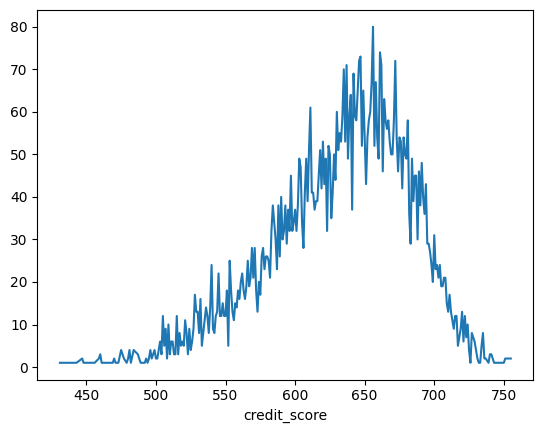

In [6]:
ones = train[train['loan_status'] == 1]
ones

creditCount = ones.groupby('credit_score').size()
creditCount.plot()
    

<Axes: xlabel='cb_person_cred_hist_length'>

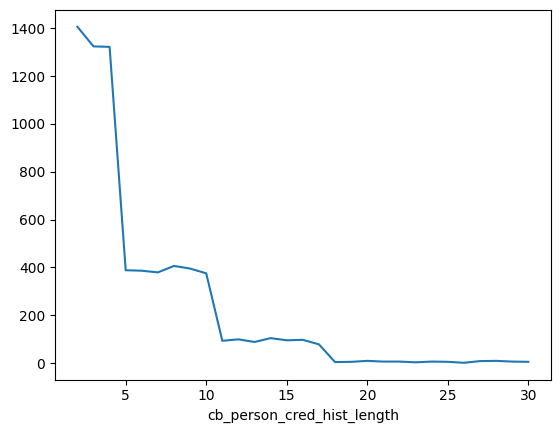

In [7]:
ones = train[train['loan_status'] == 1]
ones

histCount = ones.groupby('cb_person_cred_hist_length').size()
histCount.plot()




<Axes: xlabel='person_income'>

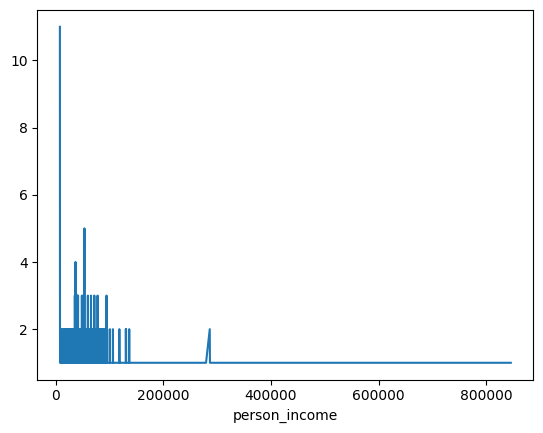

In [8]:
ones = train[train['loan_status'] == 1]
ones

incomeCount = ones.groupby('person_income').size()
incomeCount.plot()






<Axes: xlabel='person_age'>

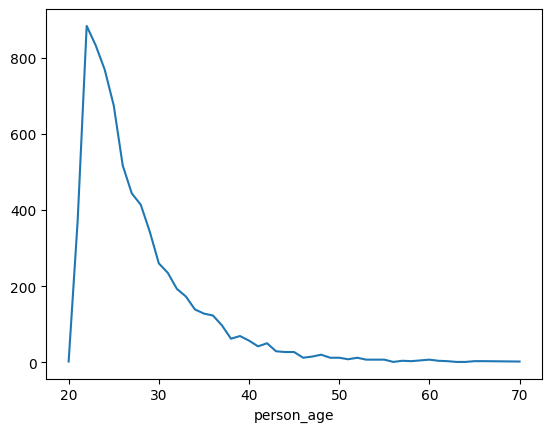

In [9]:
ones = train[train['loan_status'] == 1]
ones

ageCount = ones.groupby('person_age').size()
ageCount.plot()




In [10]:
neigh = KNeighborsClassifier(n_neighbors = 511)
x = train[['person_age', 'person_income', 'cb_person_cred_hist_length', 'credit_score', 'loan_int_rate', 'loan_percent_income']]
y = train['loan_status']
neigh.fit(x, y)

train_pred = neigh.predict(train[['person_age', 'person_income', 'cb_person_cred_hist_length', 'credit_score', 'loan_int_rate', 'loan_percent_income']])

train['knnClass'] = train_pred
train

train_accuracy = np.sum(np.count_nonzero(train['knnClass'] == train['loan_status'])) / len(train) * 100
train_accuracy

C:\Users\stanx\AppData\Local\Temp\ipykernel_24056\2348054728.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['knnClass'] = train_pred


np.float64(80.78814814814815)

In [11]:
test_pred = neigh.predict(test[['person_age', 'person_income', 'cb_person_cred_hist_length', 'credit_score', 'loan_int_rate', 'loan_percent_income']])
test['knnClass'] = test_pred


test_accuracy = np.sum(np.count_nonzero(test['knnClass'] == test['loan_status'])) / len(test) * 100
test_accuracy



C:\Users\stanx\AppData\Local\Temp\ipykernel_24056\2974950964.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['knnClass'] = test_pred


np.float64(76.67555555555555)

In [13]:

def accuracyTest(k):
    neigh = KNeighborsClassifier(n_neighbors = k)
    x = train[['person_age', 'person_income', 'cb_person_cred_hist_length', 'credit_score', 'loan_int_rate', 'loan_percent_income']]
    y = train['loan_status']
    neigh.fit(x, y)


    test_pred = neigh.predict(test[['person_age', 'person_income', 'cb_person_cred_hist_length', 'credit_score', 'loan_int_rate', 'loan_percent_income']])
    test['knnClass'] = test_pred


    test_accuracy = np.sum(np.count_nonzero(test['knnClass'] == test['loan_status'])) / len(test) * 100
    return test_accuracy

accurayK = np.array([])

for i in np.arange(3, 501, 6):
    accurayK = np.append(accurayK, accuracyTest(i))



C:\Users\stanx\AppData\Local\Temp\ipykernel_24056\3205278134.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['knnClass'] = test_pred
C:\Users\stanx\AppData\Local\Temp\ipykernel_24056\3205278134.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['knnClass'] = test_pred
C:\Users\stanx\AppData\Local\Temp\ipykernel_24056\3205278134.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cave

(array([18]),)

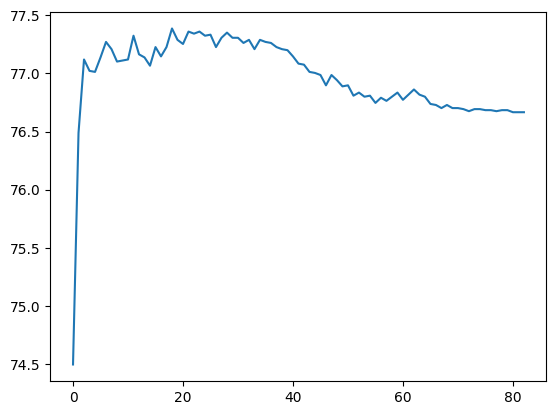

In [15]:
plt.plot(accurayK)

#fining the most optimal K value to maximize accuracy
maximumAcc = max(accurayK)
maxindex = 0

maxIndex = np.where(accurayK == maximumAcc)
maxIndex


In [23]:
print(accurayK[18])

6*18+3


77.38666666666667


111

In [26]:
#MOST ACCURATE k VALUE for KNN accuracy

accuracyTest(111)

C:\Users\stanx\AppData\Local\Temp\ipykernel_24056\3205278134.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['knnClass'] = test_pred


np.float64(77.38666666666667)